<a href="https://www.kaggle.com/code/toddgardiner/s4e11-eda-visuals?scriptVersionId=205269216" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Playground Series: Season 4, Episode 11
## Exploring Mental Health Data EDA and Visuals
This month's playground series asks us to predict the depression levels of individuals based on tabular data provided for training. Let's characterize the training and testing datasets here.

## Work to do:
1. Import Libraries
2. Import Data
3. View Data Shapes, Columnar Characteristics, and nulls
4. Test if train and test set columns dtypes match
5. Test if there is non-numeric data in numeric columns
6. Compare train and test set distributions (representative sample?)
7. View Class distribution in training columns
8. View Correlation Matrices to Understand Data Collinearity and Importance

Let's get started...

In [1]:
#import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sbs
import os


In [2]:
#import the data
train = pd.read_csv('/kaggle/input/playground-series-s4e11/train.csv')
test = pd.read_csv("/kaggle/input/playground-series-s4e11/test.csv")
#look at the shapes
train.shape, test.shape

((140700, 20), (93800, 19))

In [3]:
#make lists of the columns
trcs = list(train.columns)
tecs = list(test.columns)
#what columns are different?
for i in trcs:
    if i not in tecs:
        print(i)
        #there is only one, so we have the target, set it
        TARGET = i
        

Depression


In [4]:
# view the data 
train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [5]:
test.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [6]:
#any categories? Or all int, float, and object?
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             69168 non-null  object 
 7   Academic Pressure                      18767 non-null  float64
 8   Work Pressure                          75022 non-null  float64
 9   CGPA                                   18766 non-null  float64
 10  Study Satisfaction                     18767 non-null  float64
 11  Jo

In [8]:
#dtypes match?
for i in tecs:
    if train[i].dtype == test[i].dtype:
        print(i," identical")
    else:
        print("*** " , i, " differing dtypes")

id  identical
Name  identical
Gender  identical
Age  identical
City  identical
Working Professional or Student  identical
Profession  identical
Academic Pressure  identical
Work Pressure  identical
CGPA  identical
Study Satisfaction  identical
Job Satisfaction  identical
Sleep Duration  identical
Dietary Habits  identical
Degree  identical
Have you ever had suicidal thoughts ?  identical
Work/Study Hours  identical
Financial Stress  identical
Family History of Mental Illness  identical


In [9]:
#how many Unique values per column? (colname: train,test)
for i in tecs[1:]:
    print(f"{i}: Uniques {train[i].nunique()} , {test[i].nunique()} ")

Name: Uniques 422 , 374 
Gender: Uniques 2 , 2 
Age: Uniques 43 , 44 
City: Uniques 98 , 68 
Working Professional or Student: Uniques 2 , 2 
Profession: Uniques 64 , 64 
Academic Pressure: Uniques 5 , 5 
Work Pressure: Uniques 5 , 5 
CGPA: Uniques 331 , 326 
Study Satisfaction: Uniques 5 , 5 
Job Satisfaction: Uniques 5 , 5 
Sleep Duration: Uniques 36 , 31 
Dietary Habits: Uniques 23 , 22 
Degree: Uniques 115 , 87 
Have you ever had suicidal thoughts ?: Uniques 2 , 2 
Work/Study Hours: Uniques 13 , 13 
Financial Stress: Uniques 5 , 5 
Family History of Mental Illness: Uniques 2 , 2 


In [10]:
#only 400+ names in 230,000 observations??? Weird flex, but ok. We'll come back to that...

# do numeric columns setup and test the values for numeric
NUM_COLS = [x for x in tecs if train[x].dtype in [int,float]]
print("Numeric Columns: ", NUM_COLS)

for i in NUM_COLS:
    n = 0
    for j in range(len(train[i])):        
        if (type(train[i].iloc[j]) == np.int64) |(type(train[i].iloc[j]) == np.float64):
            pass
        else:
            n+=1
    print(f"{i} has {n} non-numeric values.")

#cleanup the numeric list...
NUM_COLS.remove('id')

Numeric Columns:  ['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']
id has 0 non-numeric values.
Age has 0 non-numeric values.
Academic Pressure has 0 non-numeric values.
Work Pressure has 0 non-numeric values.
CGPA has 0 non-numeric values.
Study Satisfaction has 0 non-numeric values.
Job Satisfaction has 0 non-numeric values.
Work/Study Hours has 0 non-numeric values.
Financial Stress has 0 non-numeric values.


Age Plots:


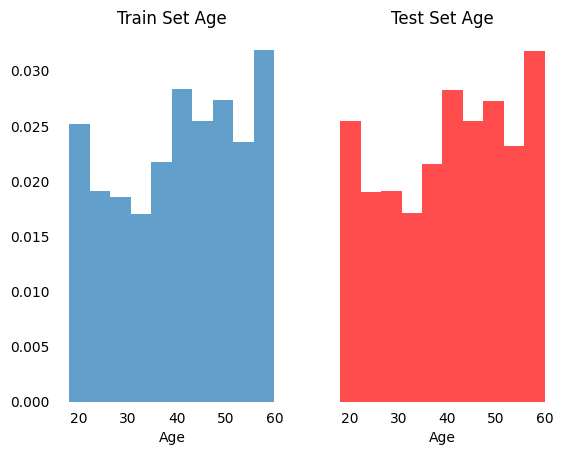


Academic Pressure Plots:


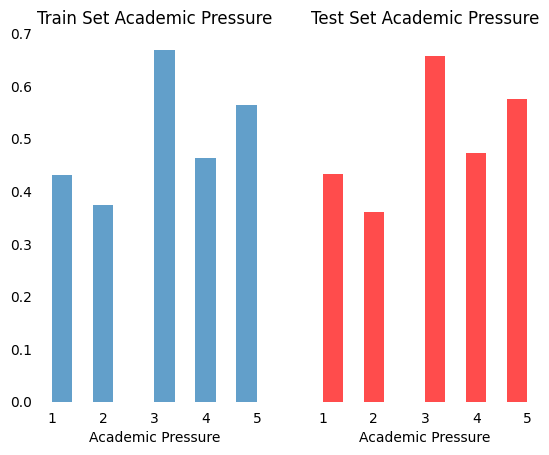


Work Pressure Plots:


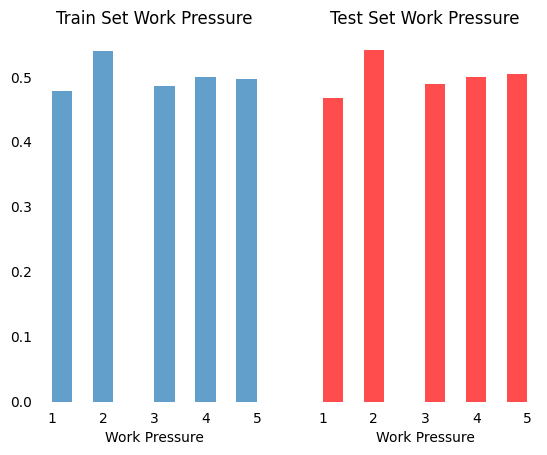


CGPA Plots:


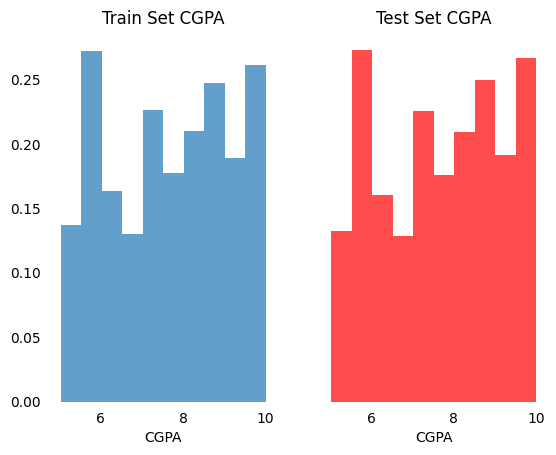


Study Satisfaction Plots:


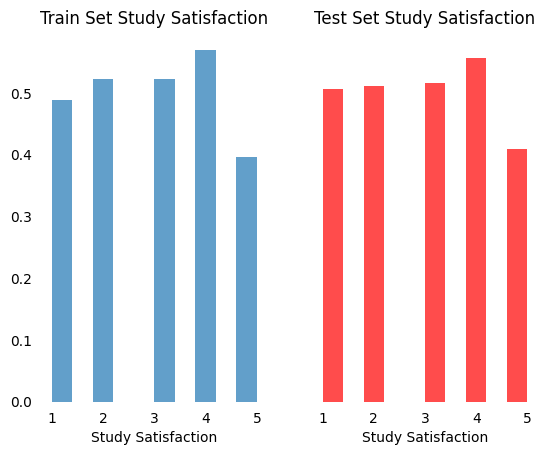


Job Satisfaction Plots:


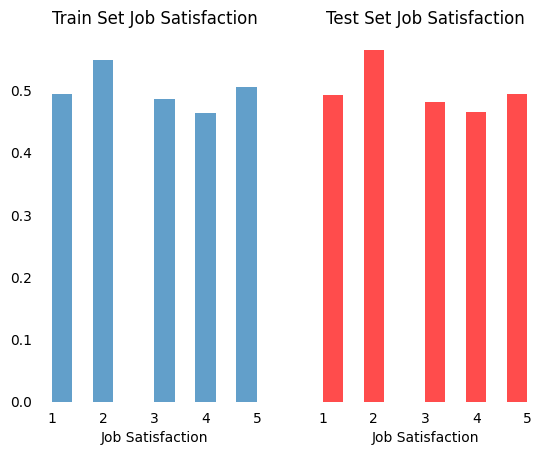


Work/Study Hours Plots:


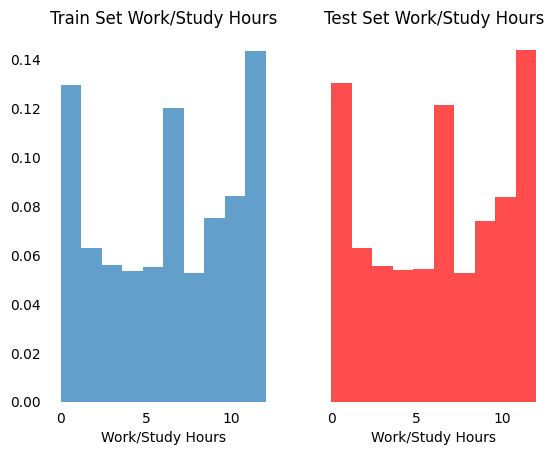


Financial Stress Plots:


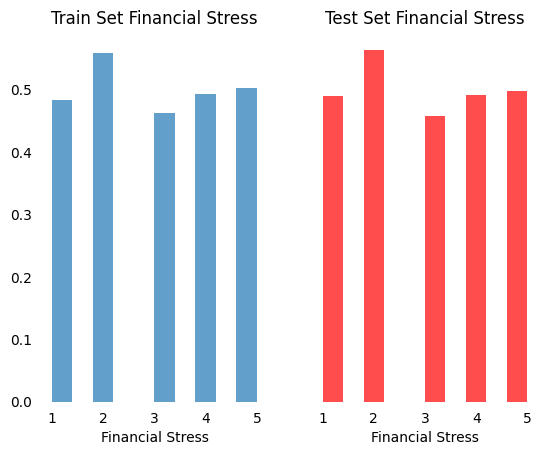

In [11]:
# great, all numerics are numeric. Let's see those distributions...
for i in NUM_COLS:
    if train[i].dtype in [int,float]:
        print(f'{i} Plots:')
        fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2, sharex=False, sharey=True)
        ax1.hist(train[i].astype(float).values, density=True, alpha=0.7)
     
        ax1.tick_params(left=False, bottom=False)
        ax1.set_xlabel(i)
        ax1.set_title(f"Train Set {i}")
        for ax, spine in ax1.spines.items():
            spine.set_visible(False)
        
        ax2.hist(test[i].astype(float).values, density=True, color='red', alpha=0.7)
       
        ax2.tick_params(left=False, bottom=False)
        ax2.set_xlabel(i)
        ax2.set_title(f"Test Set {i}")
        for ax, spine in ax2.spines.items():
            spine.set_visible(False)
        
        plt.show()
        print('')

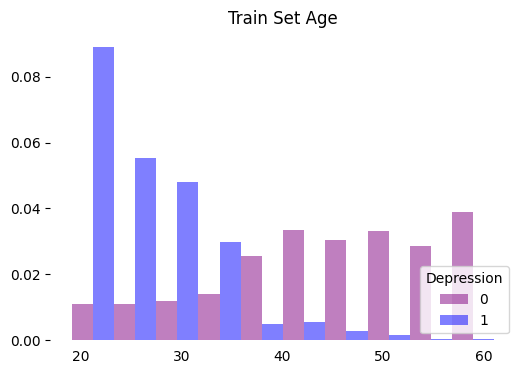

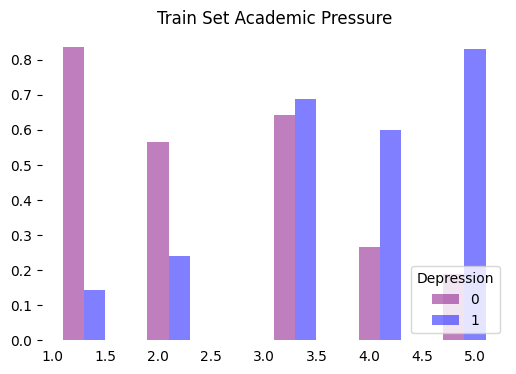

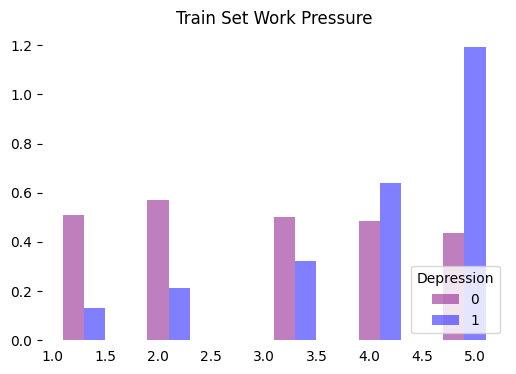

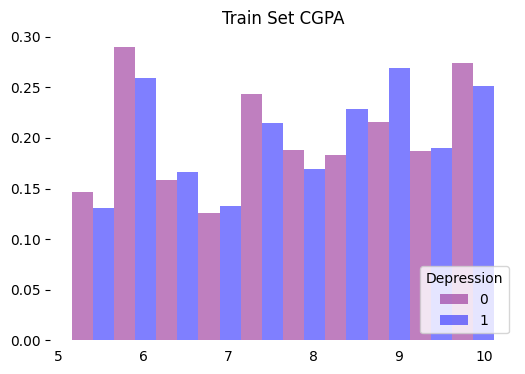

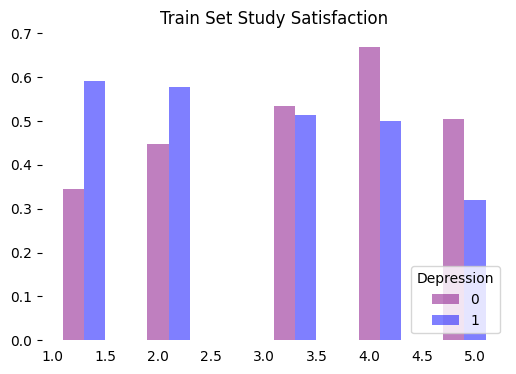

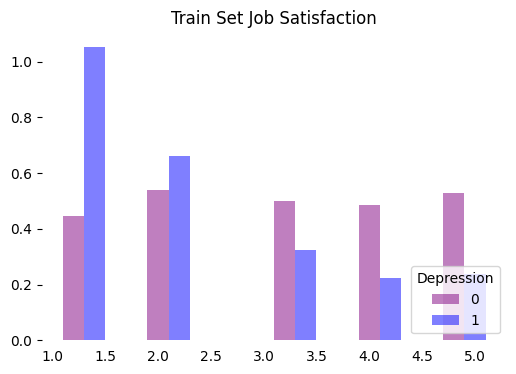

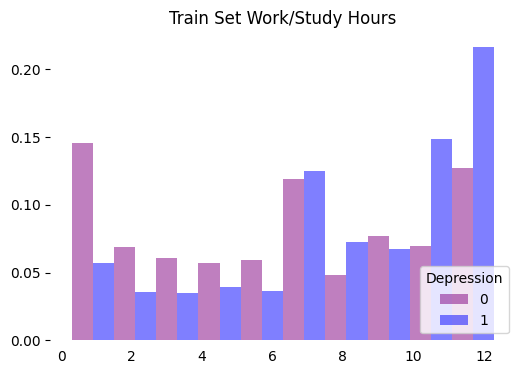

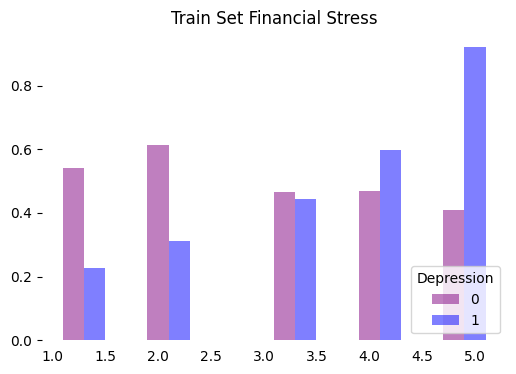

In [12]:
#cool, no weird values in the numerics.
#Train and test have similar distributions...
#Do the classes overlap much???

for i in NUM_COLS:
    if train[i].dtype in [int,float]:
        fig, ax = plt.subplots(figsize = (6,4))
        print('')
        ax.hist(train[i].loc[train[TARGET]==0].astype(float).values,density=True,color='purple',alpha=.5,label='0',align='mid',rwidth=.5)
        
        ax.hist(train[i].loc[train[TARGET]==1].astype(float).values,density=True,color='blue',alpha=.5,label='1',align='right',rwidth=.5)
        ax.tick_params(bottom=False) 
        ax.legend(title="Depression",loc=4)       
        ax.set_title(f"Train Set {i}")
        for ax, spine in ax.spines.items():
            spine.set_visible(False)
        
         
        plt.show()
        print('')

In [13]:
#the classes overlap a lot...but some variables more so than others...

#The text values will need scrutiny... let's setup the categorical columns
CAT_COLS = [x for x in tecs if x not in NUM_COLS]
CAT_COLS.remove('id')

CAT_COLS

['Name',
 'Gender',
 'City',
 'Working Professional or Student',
 'Profession',
 'Sleep Duration',
 'Dietary Habits',
 'Degree',
 'Have you ever had suicidal thoughts ?',
 'Family History of Mental Illness']

In [14]:
# let's see the value counts for those with under 20 uniques:
for i in CAT_COLS:
    if train[i].nunique() < 20:
        print(f"{i}:\n {train[i].value_counts()}\n")

Gender:
 Gender
Male      77464
Female    63236
Name: count, dtype: int64

Working Professional or Student:
 Working Professional or Student
Working Professional    112799
Student                  27901
Name: count, dtype: int64

Have you ever had suicidal thoughts ?:
 Have you ever had suicidal thoughts ?
No     71138
Yes    69562
Name: count, dtype: int64

Family History of Mental Illness:
 Family History of Mental Illness
No     70758
Yes    69942
Name: count, dtype: int64



In [15]:
#Those 4 are clean. That's nice, we can one-hot encode those in place... 


# let's see the value counts for the 6 CAT_COLS with more than 20 uniques:
for i in CAT_COLS:
    if train[i].nunique() >= 20:
        print(f"{i}:\n {train[i].value_counts()}\n")

# thats some dirty data... we'll need to clean that... 
# and we know from above that there are less than 500 unique names in the whole set


Name:
 Name
Rohan       3178
Aarav       2336
Rupak       2176
Aaradhya    2045
Anvi        2035
            ... 
Anhil          1
Rieta          1
Zahra          1
Jathesh        1
Aarun          1
Name: count, Length: 422, dtype: int64

City:
 City
Kalyan         6591
Patna          5924
Vasai-Virar    5765
Kolkata        5689
Ahmedabad      5613
               ... 
Shrey             1
Ivaan             1
Vaanya            1
Gaurav            1
Unirar            1
Name: count, Length: 98, dtype: int64

Profession:
 Profession
Teacher           24906
Content Writer     7814
Architect          4370
Consultant         4229
HR Manager         4022
                  ...  
BBA                   1
City Manager          1
FamilyVirar           1
B.Com                 1
Yuvraj                1
Name: count, Length: 64, dtype: int64

Sleep Duration:
 Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours              

<Axes: >

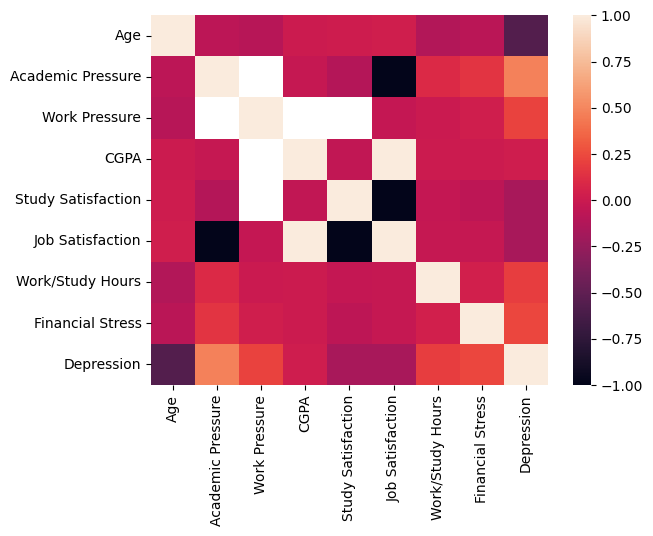

In [16]:
#multicollinearity check and correlation to Target...(train)
cnn = NUM_COLS.copy()
cnn.append(str(TARGET))
sbs.heatmap(train[cnn].corr())

<Axes: >

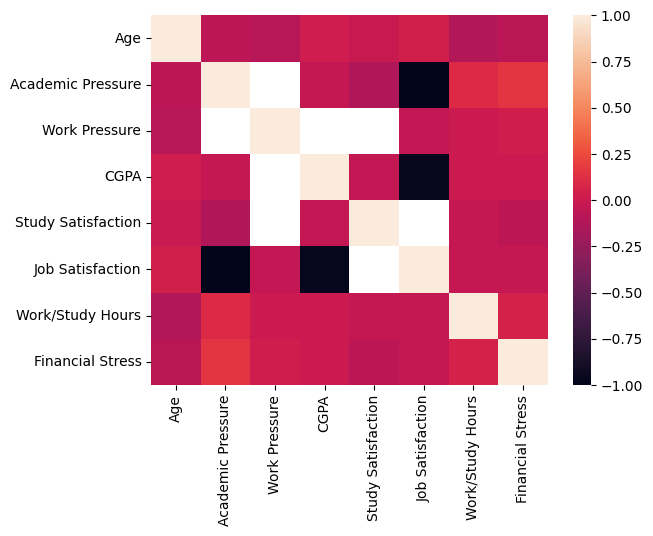

In [17]:
#multicollinearity check ...(test)
sbs.heatmap(test[NUM_COLS].corr())

In [18]:
#they have similar patterns, which is encouraging

#more to come...